In [1]:
import sys
import os

import csv
import json
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import re

import nltk
from nltk import *
from nltk.text import Text
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.collocations import BigramCollocationFinder
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer


In [2]:
file_path = "ESConv.json"

with open(file_path, "r", encoding="utf-8") as file:
    dataset = json.load(file)
    
# base on the ESConv.json create the pd.DataFrame with Conversation ID and emotion dominate in this ID (emotion taking form the conversation with psychologist)
emotion_type_list = []
conv_id = 0
for corpus in dataset:
    conv_id += 1
    emotion_type = corpus['emotion_type']
    emotion_type_list.append([conv_id, emotion_type])
    
emotion_type_df = pd.DataFrame(emotion_type_list, columns=['ConversationID', 'Emotion Type'])
    

In [3]:
emotion_type_df.head()

,ConversationID,Emotion Type
0,1,anxiety
1,2,anger
2,3,fear
3,4,depression
4,5,depression


In [20]:
def comparison(x, y):
    if y['ConversationID'] == x:
        return y['Emotion Type']

| Conversation ID | Seeker Dialog | Emotion Type |

In [23]:
def SeekerDialog_EmotionType_toFile(dataset):
    ''' it creates two df: 
            1. conv_id | dialog | emotion type; 
            2. conv_id | seeker dialog
        save the .xlxs file with seeker dialog '''
    
    corpus_data = []
    emotion_type_list = []
    conv_id = 0
    
    print("*** Loading dataset ***")

    for corpus in dataset:
        conv_id += 1
        dialog = corpus['dialog']
        emotion_type = corpus['emotion_type']
        emotion_type_list.append([conv_id, emotion_type])
        corpus_data.append(dialog)
    
    df = pd.DataFrame({'Dialog': pd.Series(corpus_data), 'ConversationID': conv_id, 'Emotion Type': emotion_type})
    seeker_df = pd.DataFrame(columns=['ConversationID', 'Seeker Dialog'])
    
    print(df.head())
    
    print("*** Reconstruction of dataset ***")
    
    for index, row in df.iterrows():
        dialog_list = row['Dialog']
        for dialog in dialog_list:
            if dialog['speaker'] == 'seeker':
                seeker_df = seeker_df.append({'ConversationID': index, 'Seeker Dialog': dialog['content']}, ignore_index=True) 
    
    output_file = 'seekerDialog.xlsx'
    seeker_df.to_excel(output_file, index=False)

    
    #seeker_df['Emotion Type'] = seeker_df.apply(lambda row: print)

    #seeker_df['Emotion Type'] = seeker_df.apply(lambda row: comparison(row, df))
    
    #seeker_df['Emotion Type'] = np.where((seeker_df['ConversationID'] == df['ConversationID']), df['Emotion Type'], np.nan)
    
    #dataset[sentiment + ' sentiment'] = dataset['Tokens'].apply(lambda row: totalRawWordSentiment(row, data_dict))
    
    

    #seeker_df['Emotion Type'] = seeker_df['ConversationID'].apply(lambda row: comparison(row, df['ConversationID']))
    #seeker_df['Emotion Type'] = seeker_df.apply(lambda x: df['Emotion Type'] if seeker_df['ConversationID'] == df['ConversationID'] else np.nan, axis=1)
    return seeker_df
    
seeker_df = SeekerDialog_EmotionType_toFile(dataset)

*** Loading dataset ***
   ConversationID                                             Dialog  \
0            1300  [{'speaker': 'seeker', 'annotation': {}, 'cont...   
1            1300  [{'speaker': 'supporter', 'annotation': {'stra...   
2            1300  [{'speaker': 'supporter', 'annotation': {'stra...   
3            1300  [{'speaker': 'supporter', 'annotation': {'stra...   
4            1300  [{'speaker': 'supporter', 'annotation': {'stra...   

  Emotion Type  
0      disgust  
1      disgust  
2      disgust  
3      disgust  
4      disgust  
*** Reconstruction of dataset ***


In [9]:
def SeekerDialog_EmotionType_toFile(dataset):
    corpus_data = []
    emotion_type_list = []
    conv_id = 0

    for corpus in dataset:
        conv_id += 1
        dialog = corpus['dialog']
        emotion_type = corpus['emotion_type']
        emotion_type_list.append([conv_id, emotion_type])
        corpus_data.append(dialog)
    df = pd.DataFrame({'Dialog': pd.Series(corpus_data), 'ConversationID': conv_id, 'Emotion Type': emotion_type})
    
    seeker_df = pd.DataFrame(columns=['ConversationID', 'Seeker Dialog', 'Emotion Type'])
    for index, row in df.iterrows():
        dialog_list = row['Dialog']
        for dialog in dialog_list:
            if dialog['speaker'] == 'seeker':
                seeker_df = seeker_df.append({'ConversationID': index, 'Seeker Dialog': dialog['content']}, ignore_index=True) 
    
    for row in seeker_df.iterrows():
        for i in df.iterrows():
            if row['ConversationID'] == i['ConversationID']:
                row['Emotion Type'] = i['Emotion Type']
     
    output_file = 'SeekerDialog_supervised.xlsx'
    dataset.to_excel(output_file, index=False)
SeekerDialog_EmotionType_toFile(dataset)

TypeError: tuple indices must be integers or slices, not str

In [4]:
df = pd.read_excel("seekerDialog.xlsx")

In [5]:
df.head()

,ConversationID,Seeker Dialog
0,0,Hello\n
1,0,I am having a lot of anxiety about quitting my...
2,0,I have to deal with many people in hard financ...
3,0,"I do, but often they are not going to get back..."
4,0,That is true but sometimes I feel like I shoul...


In [6]:
df = df.merge(emotion_type_df, left_on='ConversationID',right_on='ConversationID', how='inner')

In [7]:
df.head()

,ConversationID,Seeker Dialog,Emotion Type
0,1,hello im looking for someone to talk to,anxiety
1,1,im fine how are you\n,anxiety
2,1,thats great and no its not snowing its very co...,anxiety
3,1,merry christmas to you also \n,anxiety
4,1,im having some issues with friends not actuall...,anxiety


In [8]:
df['Emotion Type'].value_counts()

anxiety        5526
depression     5227
sadness        4637
anger          1774
fear           1441
shame           566
disgust         547
nervousness     215
jealousy         15
pain             14
guilt            14
Name: Emotion Type, dtype: int64

In [9]:
emotion_type_df['Emotion Type'].value_counts()

anxiety        354
depression     334
sadness        308
anger          111
fear            95
shame           42
disgust         40
nervousness     13
jealousy         1
pain             1
guilt            1
Name: Emotion Type, dtype: int64

In [39]:
emotion_type_df['label_num'] = emotion_type_df['Emotion Type'].map({
    'anxiety':0,
    'depression':1,
    'sadness':2, 
    'anger':3,
    'fear':4,
    'shame':5,
    'disgust':6,
    'nervousness':7,
    'pain':8,
    'guilt':9,
    'jealousy':10})


emotion_type_df.head(5)

,ConversationID,Emotion Type,label_num
0,1,anxiety,0
1,2,anger,3
2,3,fear,4
3,4,depression,1
4,5,depression,1


In [11]:
df['label_num'] = df['Emotion Type'].map({
    'anxiety':0,
    'depression':1,
    'sadness':2, 
    'anger':3,
    'fear':4,
    'shame':5,
    'disgust':6,
    'nervousness':7,
    'pain':8,
    'guilt':9,
    'jealousy':10})

df.head(5)

,ConversationID,Seeker Dialog,Emotion Type,label_num
0,1,hello im looking for someone to talk to,anxiety,0
1,1,im fine how are you\n,anxiety,0
2,1,thats great and no its not snowing its very co...,anxiety,0
3,1,merry christmas to you also \n,anxiety,0
4,1,im having some issues with friends not actuall...,anxiety,0


In [37]:
df = df.rename(columns={'Seeker Dialog': 'Dialog', 'Emotion Type': 'Emotion Type'})

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.Dialog, df.label_num, test_size=0.2)

In [14]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (15980,)
Shape of X_test:  (3996,)


In [15]:
y_train.value_counts()

0     4405
1     4187
2     3722
3     1417
4     1140
5      460
6      444
7      173
9       12
8       11
10       9
Name: label_num, dtype: int64

# TF-IDF features

## What is TF (term frequency)?

Term frequency works by looking at the frequency of a particular term you are concerned with relative to the document. There are multiple measures, or ways, of defining frequency:

- Number of times the word appears in a document (raw count).
- Term frequency adjusted for the length of the document (raw count of occurences divided by number of words in the document).
- Logarithmically scaled frequency (e.g. log(1 + raw count)).
- Boolean frequency (e.g. 1 if the term occurs, or 0 if the term does not occur, in the document).

## What is IDF (inverse document frequency)?

Inverse document frequency looks at how common (or uncommon) a word is amongst the corpus. IDF is calculated as follows where t is the term (word) we are looking to measure the commonness of and N is the number of documents (d) in the corpus (D).. The denominator is simply the number of documents in which the term, t, appears in. 

## Putting it together: TF-IDF

To summarize the key intuition motivating TF-IDF is the importance of a term is inversely related to its frequency across documents.TF gives us information on how often a term appears in a document and IDF gives us information about the relative rarity of a term in the collection of documents. By multiplying these values together we can get our final TF-IDF value.

The higher the TF-IDF score the more important or relevant the term is; as a term gets less relevant, its TF-IDF score will approach 0.

TF-IDF vectorization involves calculating the TF-IDF score for every word in your corpus relative to that document and then putting that information into a vector. Thus each document in your corpus would have its own vector, and the vector would have a TF-IDF score for every single word in the entire collection of documents.

## Bag of Words

Bag of Words (BoW) simply counts the frequency of words in a document. Thus the vector for a document has the frequency of each word in the corpus for that document.  The key difference between bag of words and TF-IDF is that the former does not incorporate any sort of inverse document frequency (IDF)  and is only a frequency count (TF).
## Word2Vec

Word2Vec is an algorithm that uses shallow 2-layer, not deep, neural networks to ingest a corpus and produce sets of vectors. Some key differences between TF-IDF and word2vec is that TF-IDF is a statistical measure that we can apply to terms in a document and then use that to form a vector whereas word2vec will produce a vector for a term and then more work may need to be done to convert that set of vectors into a singular vector or other format. Additionally TF-IDF does not take into consideration the context of the words in the corpus whereas word2vec does.
## BERT - Bidirectional Encoder Representations from Transformers

BERT is an ML/NLP technique developed by Google that uses a transformer based ML model to  convert phrases, words, etc into vectors. Key differences between TF-IDF and BERT are as follows: TF-IDF does not take into account the semantic meaning or context of the words whereas BERT does. Also BERT uses deep neural networks as part of its architecture, meaning that it can be much more computationally expensive than TF-IDF which has no such requirements. 

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.28      0.16      0.20      1121
          1       0.25      0.11      0.15      1040
          2       0.24      0.74      0.36       915
          3       0.19      0.01      0.03       357
          4       0.04      0.00      0.01       301
          5       0.00      0.00      0.00       106
          6       0.00      0.00      0.00       103
          7       0.00      0.00      0.00        42
          8       0.00      0.00      0.00         3
          9       0.00      0.00      0.00         2
         10       0.00      0.00      0.00         6

avg / total       0.22      0.24      0.18      3996



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
# preprocessing 

In [25]:
def normalization(dataset):
    """Input: pd.Dataframe"""
    # Removing unnecessary characters such as newlines and extra spaces
    dataset['Dialog'] = dataset['Dialog'].str.replace('\n', ' ')  # Replacing newline characters with spaces

    # Converting the text to lowercase for consistency
    dataset['Dialog'] = dataset['Dialog'].str.lower()

    # Tokenizing the text into individual words or sentences
    dataset['processed_text'] = dataset['Dialog'].apply(word_tokenize)

    # Removing any stop words if required
    stop_words = set(stopwords.words('english'))
    dataset['processed_text'] = dataset['processed_text'].apply(lambda tokens: [token for token in tokens if token not in stop_words])
        
    # Lemmatization or stemming to reduce words to their base forms
    lemmatizer = WordNetLemmatizer()
    dataset['processed_text'] = dataset['processed_text'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])
    
    dataset['processed_text'] = [','.join(map(str, l)) for l in df['processed_text']]
    return dataset

In [26]:
df = normalization(df)

In [27]:
df

,ConversationID,Dialog,Emotion Type,label_num,processed_text
0,1,hello im looking for someone to talk to,anxiety,0,"hello,im,looking,someone,talk"
1,1,im fine how are you,anxiety,0,"im,fine"
2,1,thats great and no its not snowing its very co...,anxiety,0,"thats,great,snowing,cold,thow"
3,1,merry christmas to you also,anxiety,0,"merry,christmas,also"
4,1,im having some issues with friends not actuall...,anxiety,0,"im,issue,friend,actually,friend"
5,1,yes,anxiety,0,yes
6,1,yes their is no communication or interaction b...,anxiety,0,"yes,communication,interaction,nobody,answer,ph..."
7,1,no friends,anxiety,0,friend
8,1,when we where younger we all hung out all the ...,anxiety,0,"younger,hung,time,older,like,talk,im,sure,anyt..."
9,1,it doesnt matter they still keep open communic...,anxiety,0,"doesnt,matter,still,keep,open,communication"


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    df.processed_text, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.27      0.38      0.32      1105
          1       0.25      0.34      0.29      1046
          2       0.22      0.20      0.21       928
          3       0.09      0.03      0.04       355
          4       0.09      0.03      0.04       288
          5       0.00      0.00      0.00       113
          6       0.00      0.00      0.00       109
          7       0.00      0.00      0.00        43
          8       0.00      0.00      0.00         3
          9       0.00      0.00      0.00         3
         10       0.00      0.00      0.00         3

avg / total       0.21      0.24      0.22      3996



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())          
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.29      0.60      0.39      1105
          1       0.31      0.35      0.33      1046
          2       0.32      0.19      0.24       928
          3       0.00      0.00      0.00       355
          4       0.00      0.00      0.00       288
          5       0.00      0.00      0.00       113
          6       0.00      0.00      0.00       109
          7       0.00      0.00      0.00        43
          8       0.00      0.00      0.00         3
          9       0.00      0.00      0.00         3
         10       0.00      0.00      0.00         3

avg / total       0.24      0.30      0.25      3996



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.29      0.44      0.35      1105
          1       0.27      0.32      0.29      1046
          2       0.24      0.22      0.23       928
          3       0.12      0.05      0.07       355
          4       0.08      0.02      0.04       288
          5       0.00      0.00      0.00       113
          6       0.00      0.00      0.00       109
          7       0.00      0.00      0.00        43
          8       0.00      0.00      0.00         3
          9       0.00      0.00      0.00         3
         10       0.00      0.00      0.00         3

avg / total       0.22      0.26      0.23      3996



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[482, 330, 232,  38,  16,   1,   4,   2,   0,   0,   0],
       [417, 333, 221,  40,  28,   2,   4,   1,   0,   0,   0],
       [374, 297, 202,  36,  15,   2,   2,   0,   0,   0,   0],
       [136, 110,  76,  17,  11,   2,   1,   2,   0,   0,   0],
       [126,  86,  57,  11,   7,   1,   0,   0,   0,   0,   0],
       [ 46,  35,  29,   2,   1,   0,   0,   0,   0,   0,   0],
       [ 53,  32,  18,   2,   4,   0,   0,   0,   0,   0,   0],
       [ 21,  13,   8,   0,   1,   0,   0,   0,   0,   0,   0],
       [  1,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0],
       [  2,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

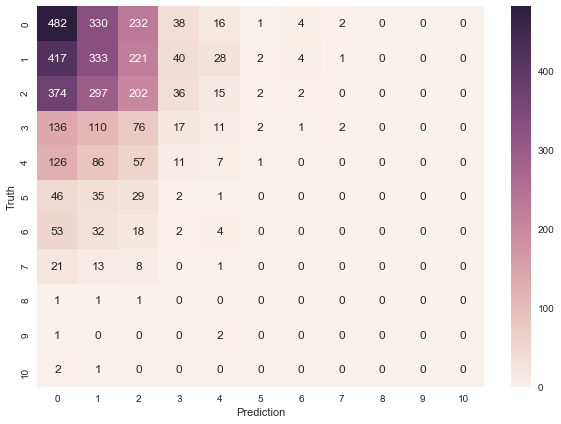

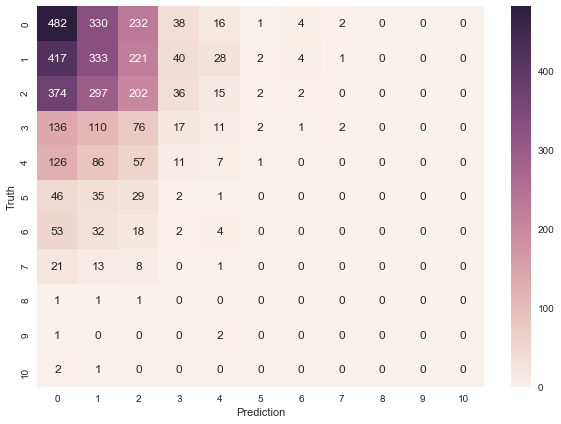

In [35]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

In [ ]:
sharp

Done: na chama podzieliłam wg zasady         split_index = int(0.8 * len(seeker_dialog))
        podzielic dialog 80:20 predict na 80 test na 20, znalezc key words, prediction for future
    
bazować na slowach/wyrazeniach kluczach (znalezc artykul gdzie to bylo), ktore moga swiadczyc o problemach psychicznych

slowa opatrzec w kontekst

(emo2vec)

i na tej podstawie sklasyfikowac

przetestowac rozne klasyfikaotory